# <center>Principal Component Analysis</center>
----

berdasarkan artikel 'A Tutorial on Principal Component Analysis' oleh LI Smith http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf

## Pemahaman PCA

1. Hitung rerata dari tiap kolom data
2. Kurangi setiap data dengan rerata kolomnya. Hasilnya kita namakan dengan adjusted data
3. Hitung covariance matrix
4. Hitung eigen value dan eigen vector dari covariance matrix
5. Urutkan eigen vector dari besar ke kecil sesuai dengan eigen value-nya
6. Tiap principle component diwakili oleh tiap eigen vector dan eigen value. Hitung dot product dari eigen vector dengan adjusted data

Jika kita memiliki fitur dalam bentuk matriks A dengan ukuran $m\times n$, dimana $m$ adalah baris dan $n$ adalah kolom. Maka, kita dapat mencari covariance dari A untuk mengetahui korelasi antar fitur/kolom ($n$).

In [1]:
import numpy as np

In [2]:
A = np.array([[2.5 , 2.4],[0.5 , 0.7],[2.2 , 2.9],[1.9, 2.2],[3.1, 3],[2.3, 2.7],[2, 1.6],[1, 1.1],[1.5, 1.6],[1.1, 0.9]])
print(A)

[[2.5 2.4]
 [0.5 0.7]
 [2.2 2.9]
 [1.9 2.2]
 [3.1 3. ]
 [2.3 2.7]
 [2.  1.6]
 [1.  1.1]
 [1.5 1.6]
 [1.1 0.9]]


A pada contoh diatas memiliki dimensi $10\times2$, $m=10$ dan $n=2$. Kita dapat melihat korelasi antar fitur ($n_1,n_2$) dengan dua cara. Cara pertama dengan melihat plot scatter dan yang kedua menghitung covariancenya.

In [3]:
import matplotlib.pyplot as plt

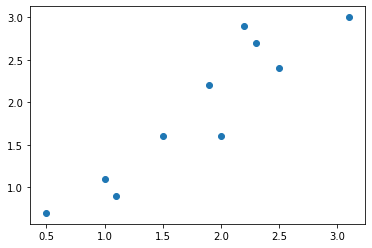

In [4]:
plt.scatter(A[:,0],A[:,1])
plt.show()

Dari plot, kita dapat melihat korelasi antar $n1$ dan $n2$. Atau kita dapat menghitungnya dengan rumus covariance, sebagai berikut :
$$cov(X,Y) = \frac{\sum_{i=1}^{n}\left ( X_i-\bar{X} \right )\left ( Y_i-\bar{Y} \right )}{\left ( n-1 \right )}$$

Dimana dalam A, $X$ adalah $n_1$ dan $Y$ adalah $n_2$. Maka, hal yang pertama kita lakukan adalah menghitung mean dari masing-masing fitur, kemudian mengurangi setiap data dengan mean kolom yang bersesuaian.

In [5]:
adj_data = A - A.mean(axis=0)
print(adj_data)

[[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]


Covariance antar $n_1$ dengan $n_1$

In [6]:
np.dot(adj_data[:,0],adj_data[:,0])/ (adj_data.shape[0]-1)

0.6165555555555556

Covariance antar $n_1$ dengan $n_2$

In [7]:
np.dot(adj_data[:,0],adj_data[:,1])/ (adj_data.shape[0]-1)

0.6154444444444445

Covariance antar $n_2$ dengan $n_1$

In [8]:
np.dot(adj_data[:,1],adj_data[:,0])/ (adj_data.shape[0]-1)

0.6154444444444445

Covariance antar $n_2$ dengan $n_2$

In [9]:
np.dot(adj_data[:,1],adj_data[:,1])/ (adj_data.shape[0]-1)

0.7165555555555555

Atau bisa menggunakan function cov dari numpy.

In [10]:
cov_mat = np.cov(A.T)
cov_mat

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

Dari matriks covariance, kita hitung eigenvector dan eigenvalue.

In [17]:
eigval, eigvec = np.linalg.eig(cov_mat)
print('Eigen Value :\n',eigval,'\n')
print('Eigen Vector :\n', eigvec)

Eigen Value :
 [0.0490834  1.28402771] 

Eigen Vector :
 [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


Cari index dari hasil sorting descending pada eigen value

In [12]:
idx = np.argsort(-1*eigval)[:eigval.shape[0]]

In [13]:
eigvec_sorted = np.zeros_like(eigvec)

Sort descending

In [14]:
for i in range (eigval.shape[0]):
    eigvec_sorted[:,i] = eigvec[:,idx[i]] 

Kemudian untuk mencari masing-masing principle component, kita mengurutkan eigen vector berdasarkan eigen value terbesar. Dalam hal ini, yang pertama adalah $n_2$ kemudian $n_1$

In [15]:
pca_comp = (np.dot(eigvec_sorted, adj_data.T)).T
print(pca_comp)

[[-0.82797019 -0.17511531]
 [ 1.77758033  0.14285723]
 [-0.99219749  0.38437499]
 [-0.27421042  0.13041721]
 [-1.67580142 -0.20949846]
 [-0.9129491   0.17528244]
 [ 0.09910944 -0.3498247 ]
 [ 1.14457216  0.04641726]
 [ 0.43804614  0.01776463]
 [ 1.22382056 -0.16267529]]


Secara ringkas, proses PCA telah ada pada library sklearn pada modul decomposition

In [16]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(A)
x = pca.transform(A)
x

array([[-0.82797019, -0.17511531],
       [ 1.77758033,  0.14285723],
       [-0.99219749,  0.38437499],
       [-0.27421042,  0.13041721],
       [-1.67580142, -0.20949846],
       [-0.9129491 ,  0.17528244],
       [ 0.09910944, -0.3498247 ],
       [ 1.14457216,  0.04641726],
       [ 0.43804614,  0.01776463],
       [ 1.22382056, -0.16267529]])

## Data Awal

In [17]:
real_value = (np.dot(eigvec_sorted,pca_comp.T)).T + A.mean(axis=0)
print(real_value)

[[2.5 2.4]
 [0.5 0.7]
 [2.2 2.9]
 [1.9 2.2]
 [3.1 3. ]
 [2.3 2.7]
 [2.  1.6]
 [1.  1.1]
 [1.5 1.6]
 [1.1 0.9]]


---------